In [2]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 加载模型
model = KeyedVectors.load_word2vec_format('50thousand.txt')

In [4]:
word_embeddings = model.vectors
words = model.index_to_key

In [5]:
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(word_embeddings)

/home/customer/anaconda3/envs/cxxenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/customer/anaconda3/envs/cxxenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [146]:
# 找到词语的位置
word = words.index("ETL")
# interphases
# interfacial
# interface

In [147]:
# 计算 "perovskite" 与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[word]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


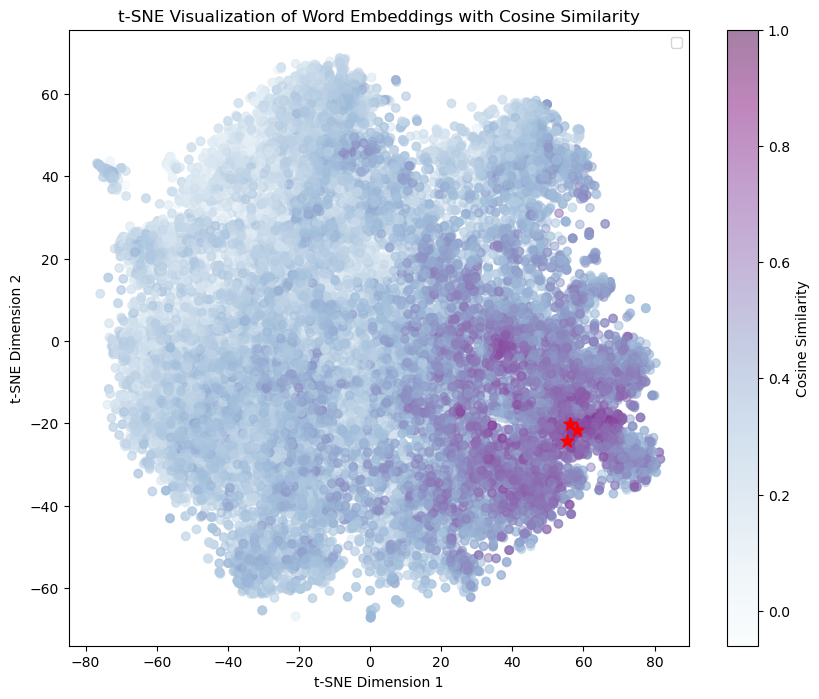

In [30]:
# 找到 "aminoguanidine" 和 "additive" 的位置
word1_index = words.index("TiO2")
word2_index = words.index("NiOx")
word3_index = words.index("Cs2CO3")
# 设置颜色映射，让余弦相似度值越大颜色越蓝
cmap = plt.cm.BuPu
# "Blues": 蓝色调的单色调颜色映射。
# "Greens": 绿色调的单色调颜色映射。
# "Reds": 红色调的单色调颜色映射。
# "Oranges": 橙色调的单色调颜色映射。
# "Purples": 紫色调的单色调颜色映射。
# "Greys": 灰度的单色调颜色映射。
# "BuPu": 蓝紫色渐变的渐变色颜色映射。
# "YlOrRd": 黄至橙至红的渐变色颜色映射。
# "viridis": 从深蓝到亮黄的渐变色颜色映射，被认为是色盲友好的颜色映射。
# "inferno": 从黑色到红色的渐变色颜色映射。
# "magma": 从黑色到紫色的渐变色颜色映射。
# "plasma": 从黑色到品红的渐变色颜色映射。
# "cividis": 从深蓝到黄色的渐变色颜色映射，也是色盲友好的颜色映射。
# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记 "aminoguanidine" 和 "additive"
# plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100, label='TiO2')
plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100)

plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='red', marker='*', s=100)
plt.scatter(tsne_embeddings[word3_index, 0], tsne_embeddings[word3_index, 1], c='red', marker='*', s=100)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')
plt.legend()

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig('intermediate.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()



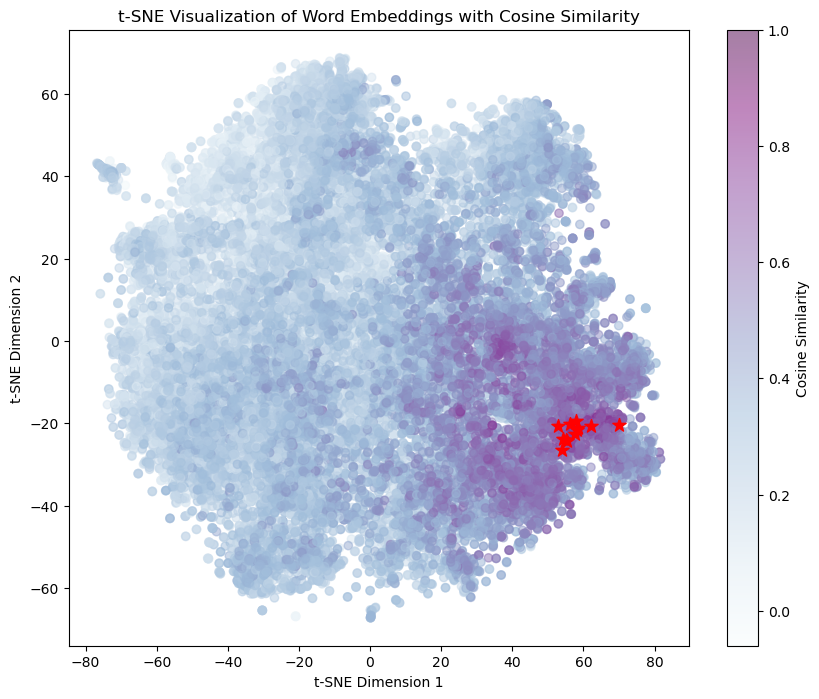

In [44]:
# 你想要标记的词汇列表
target_words = ["ETL", "TiO2", "NiOx", "Cs2CO3",'F16CuPc','MoOx','Sb2S3','CuI','PTCDA','PTB7','ZnO','CuInS2']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('ETL.png')
plt.show()

In [ ]:
# 你想要标记的词汇列表
target_words = ["ETL", "TiO2", "NiOx", "Cs2CO3",'F16CuPc','MoOx','Sb2S3','CuI','PTCDA','PTB7','ZnO','CuInS2']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('ETL.png')
plt.show()

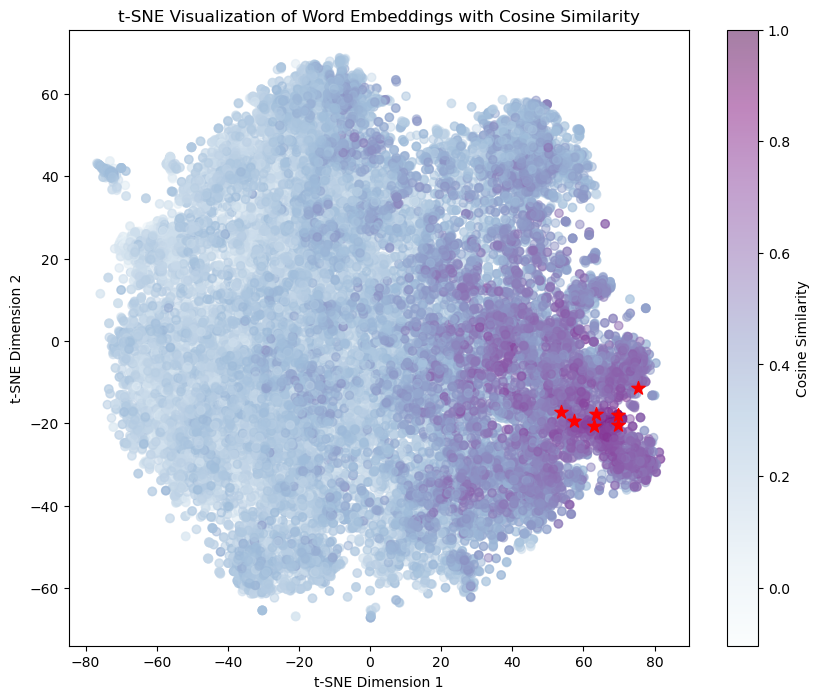

In [60]:
# 你想要标记的词汇列表
target_words = ['P3HT','WOx','MoO3','Cu2O','PCDTBT','PEDOT','PMMA']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('HTL.png')
plt.show()

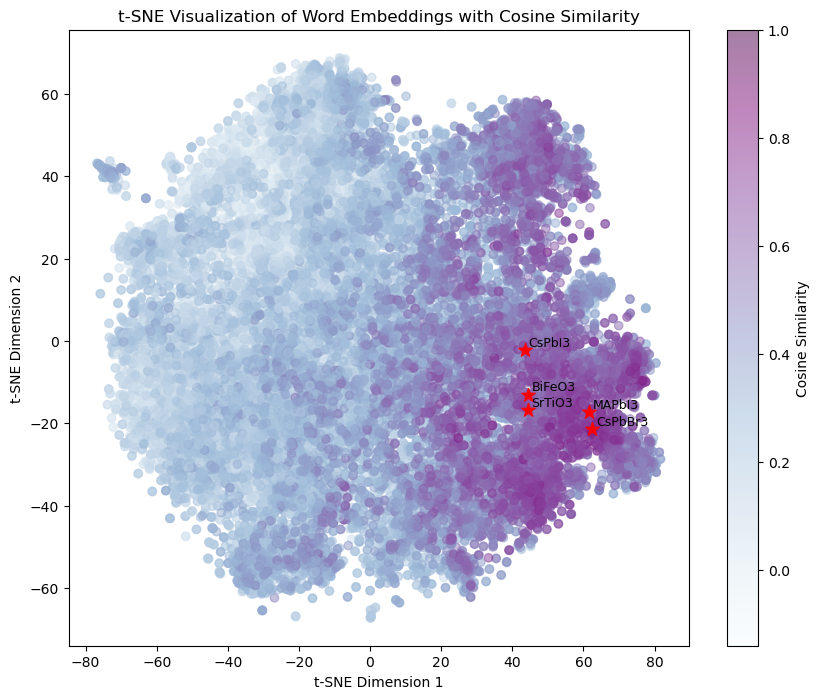

In [62]:
# 你想要标记的词汇列表
target_words = ['CsPbBr3', 'CsPbI3', 'MAPbI3', 'SrTiO3', 'BiFeO3']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('perovskite.png')
plt.show()

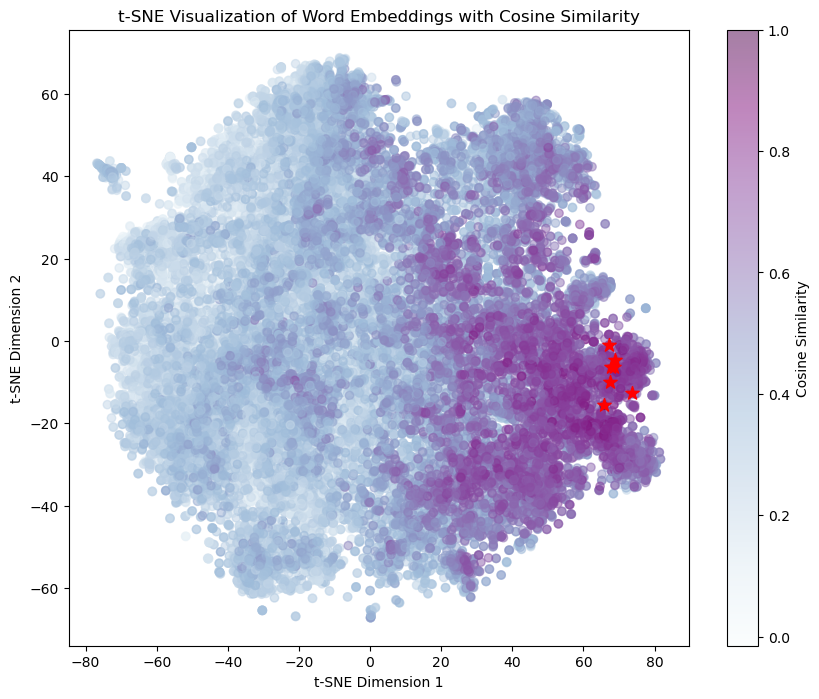

In [65]:
# 你想要标记的词汇列表
target_words = ['18-diiodooctane','NMP','hexane','DMSO','DMF','isopropyl','alcohol',]

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('solvent.png')
plt.show()

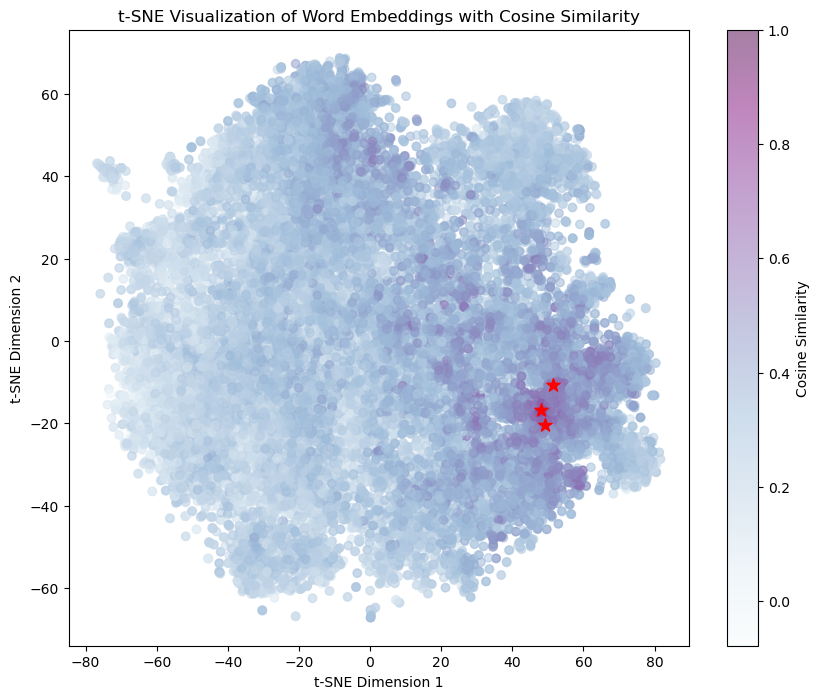

In [133]:
# 你想要标记的词汇列表
target_words = ['deposition','coating','annealing']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('fabrication.png')
plt.show()

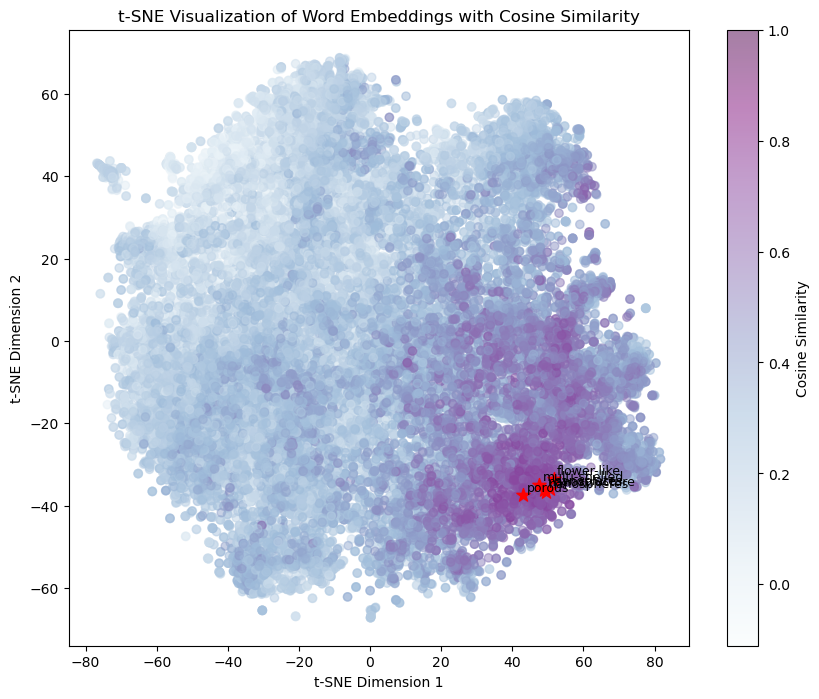

In [120]:
# 你想要标记的词汇列表
target_words = ['nanostructure','nanospheres','multi-shelled','flower-like','nanoplates','porous']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('structures.png')
plt.show()

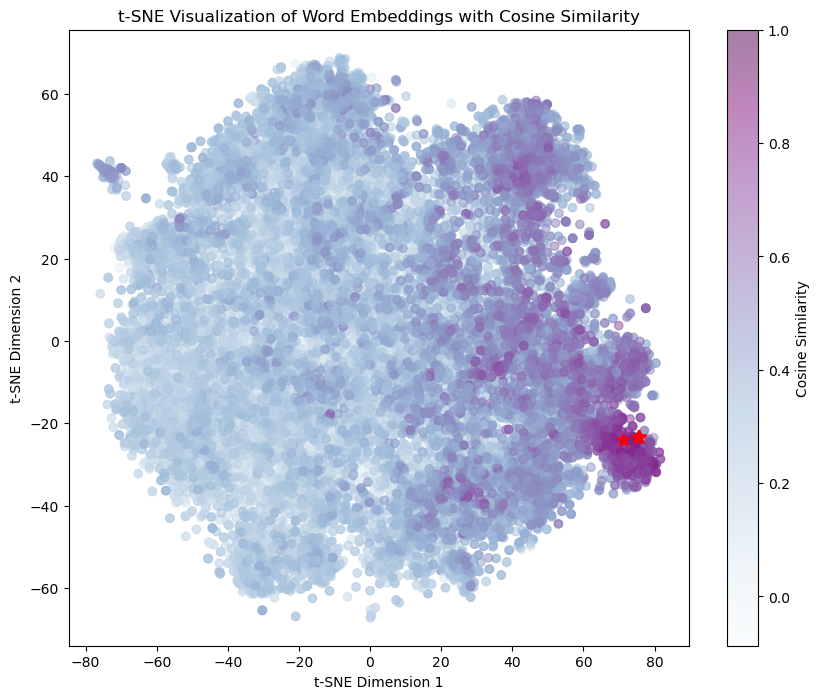

In [130]:
# 你想要标记的词汇列表
target_words = ['P1','P2','P2','P3','P5']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇
for idx in target_indices:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 1, tsne_embeddings[idx, 1] + 1, words[idx], fontsize=9)
    
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('space group.png')
plt.show()

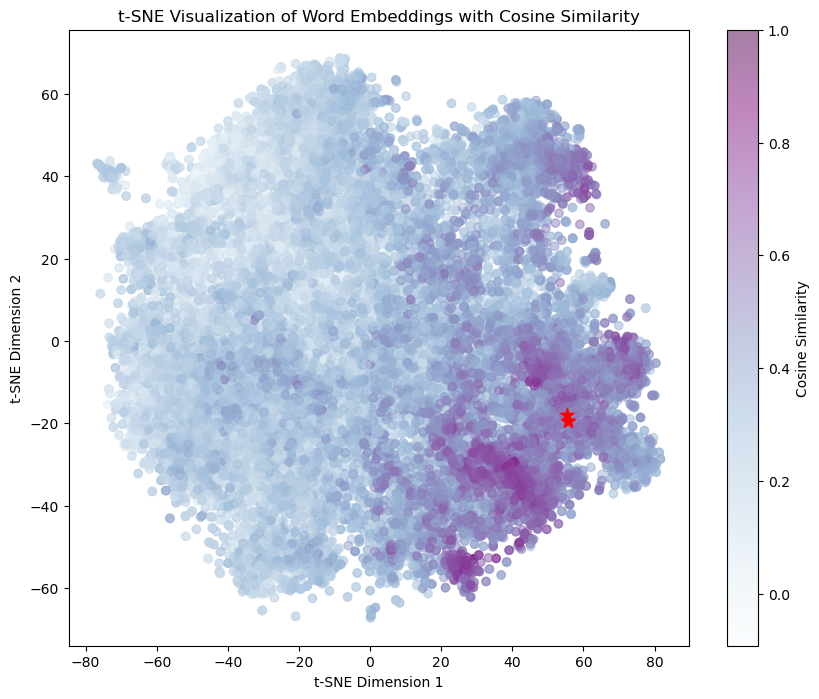

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# 假设你已经有了 words, word_embeddings 和 tsne_embeddings

# 你想要标记的词汇列表
target_words = ['cathode','Au','Ag','Al']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇（跳过第一个词汇）
for idx in target_indices[1:]:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 0.1, tsne_embeddings[idx, 1] + 0.1, words[idx], fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('cathode.png')
plt.show()


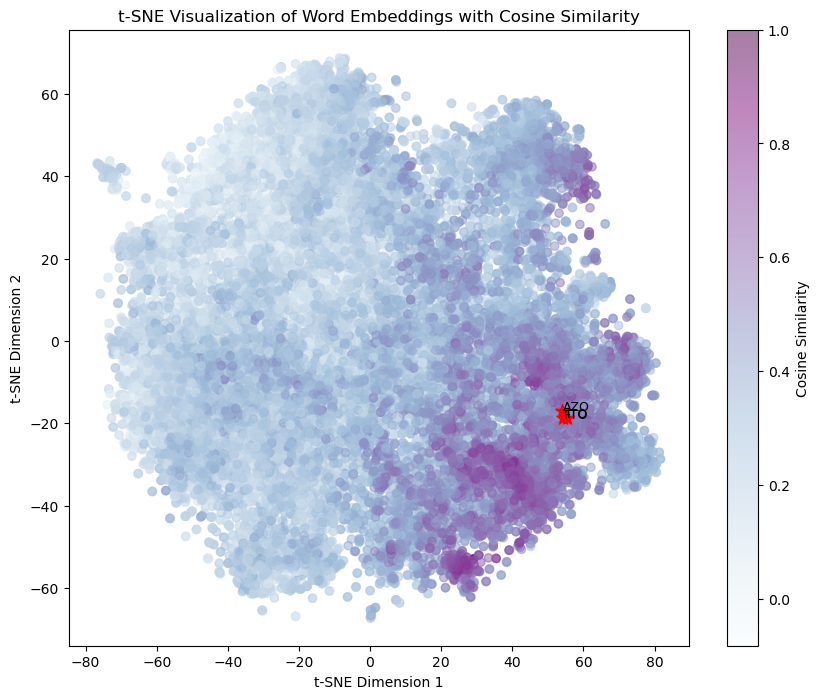

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# 假设你已经有了 words, word_embeddings 和 tsne_embeddings

# 你想要标记的词汇列表
target_words = ['anode','ITO','FTO','AZO']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇（跳过第一个词汇）
for idx in target_indices[1:]:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    plt.text(tsne_embeddings[idx, 0] + 0.1, tsne_embeddings[idx, 1] + 0.1, words[idx], fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('anode.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# 假设你已经有了 words, word_embeddings 和 tsne_embeddings

# 你想要标记的词汇列表
target_words = ['anode','ITO','FTO','AZO']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇（跳过第一个词汇）
for idx in target_indices[1:]:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    plt.text(tsne_embeddings[idx, 0] + 0.1, tsne_embeddings[idx, 1] + 0.1, words[idx], fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('anode.png')
plt.show()

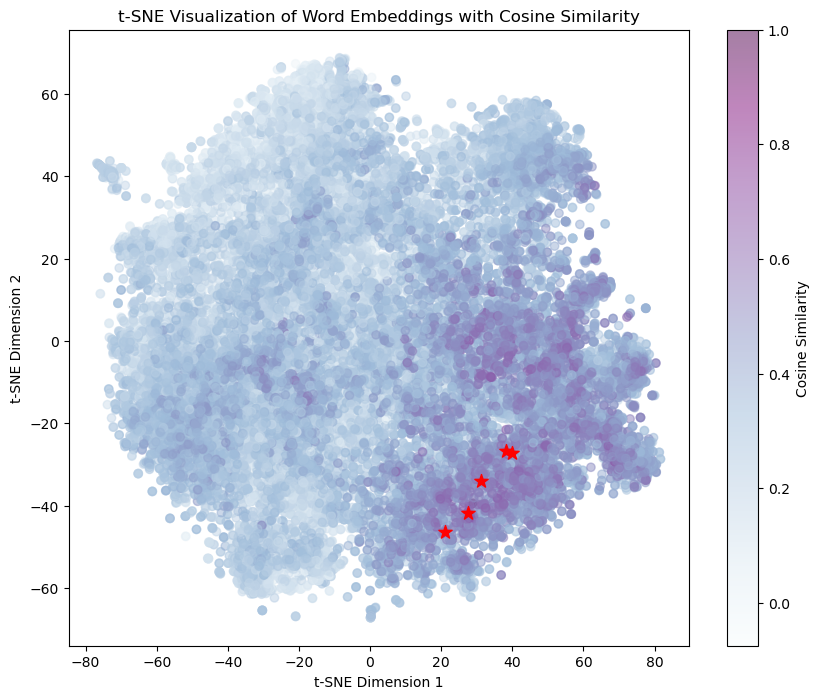

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# 假设你已经有了 words, word_embeddings 和 tsne_embeddings

# 你想要标记的词汇列表
target_words = ['property','hydrophilicity','electroactivity','wettability','biocompatibility','tunability']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇（跳过第一个词汇）
for idx in target_indices[1:]:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 0.1, tsne_embeddings[idx, 1] + 0.1, words[idx], fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('property.png')
plt.show()

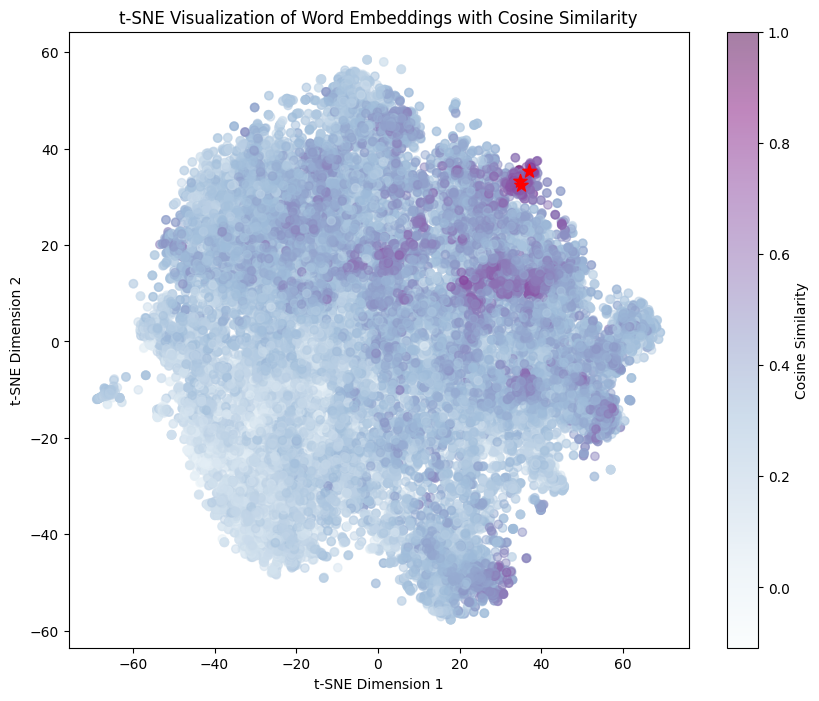

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# 假设你已经有了 words, word_embeddings 和 tsne_embeddings

# 你想要标记的词汇列表
target_words = ['battery','Li-ion','lead-acid','solid-state']

# 找到这些词汇的索引
target_indices = [words.index(word) for word in target_words]

# 计算每个词汇与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[words.index(target_words[0])]])

# 设置颜色映射
cmap = plt.cm.BuPu

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记目标词汇（跳过第一个词汇）
for idx in target_indices[1:]:
    plt.scatter(tsne_embeddings[idx, 0], tsne_embeddings[idx, 1], c='red', marker='*', s=100)
    # plt.text(tsne_embeddings[idx, 0] + 0.1, tsne_embeddings[idx, 1] + 0.1, words[idx], fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# 保存并显示图像
plt.savefig('battery.png')
plt.show()

In [12]:
for key, value in model.most_similar('solid-state', topn=100000):
    print(key)

Li-metal
LNMO
all-solid-state
sodium-ion
SIB
solvent-free
FIBs
lithium-ion
Li-
solid
ZIB
NIBs
photo-assisted
Na-S
lithium–sulfur
lithium
ion
Zn-ion
aluminum-ion
non-aqueous
nonflammable
KIBs
AZIBs
Li–CO2
SSLBs
LSBs
VO2B
DIBs
LLZO
Li-ion
binders
nonaqueous
separators/interlayers
LiS
Facile
self-standing
Li-based
infused
Li2FeSiO4
high-capacity
Na044MnO2
LMBs
Na-ion
chair
LiFePO4
LGH
infusion
rocking
non-flammable
Li
FeF3
Li-air
binder-free
Li/air
LLTa
cathodes
high-performance
Li–S
IE
Li–O2
Li7La3Zr2O12
Li–Se
ZIBs
dealloying
free-standing
cathode
Li-O2
Li4MoO5
lithium-sulfur
LICs
lanthanum
lithium-oxygen
dendrite-free
all-in-one
photo-polymerisation
Li3V2PO43
anodes
AZHBs
zinc-ion
NaTi2PO43
LiBs
NIB
Li675La3Zr175Ta025O12
Na-ion-batteries
Phosphate
self-supporting
electrolyte
TMC
fiber-shaped
PVDF-HFP
preparing
CdWO4
monovalent
microflowers
nontoxic
high-energy-density
lithium-air
conductors
LiNO3
quasi-solid-state
HIPEs
SSPE
NASICON
battery-type
garnet
ARZIBs
batteries
alginate
electrol

In [40]:
import csv
# 获取与 'ETL' 最相似的100000个词
similar_words = model.most_similar('solvent', topn=100000)

# 定义CSV文件的文件名
csv_file = 'solvent.csv'

# 将相似词写入CSV文件
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Word', 'Similarity'])  # 写入表头
    for key, value in similar_words:
        writer.writerow([key, value])

print(f'Similar words have been written to {csv_file}')

Similar words have been written to solvent.csv


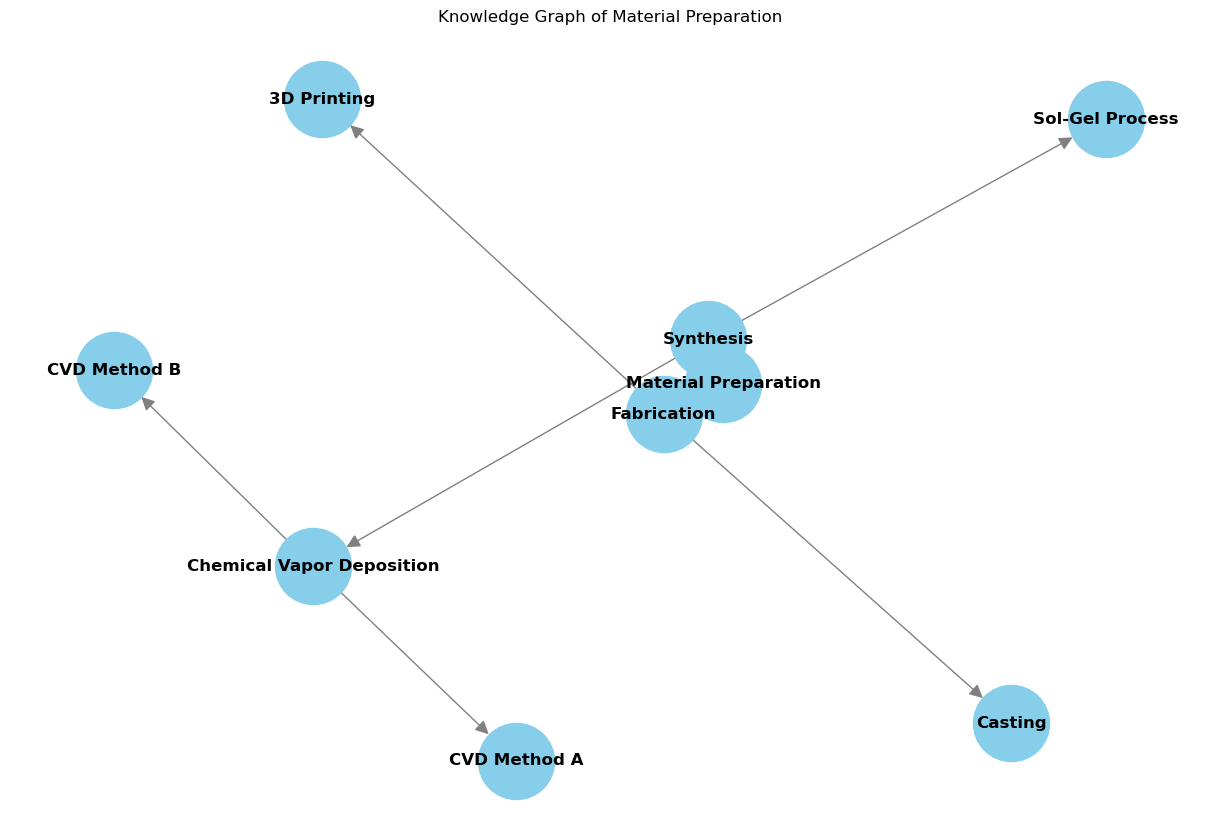

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有向图
G = nx.DiGraph()

# 添加节点和边（示例）
edges = [
    ('Material Preparation', 'Synthesis'),
    ('Material Preparation', 'Fabrication'),
    ('Synthesis', 'Chemical Vapor Deposition'),
    ('Synthesis', 'Sol-Gel Process'),
    ('Fabrication', '3D Printing'),
    ('Fabrication', 'Casting'),
    ('Chemical Vapor Deposition', 'CVD Method A'),
    ('Chemical Vapor Deposition', 'CVD Method B'),
]

# 添加节点和边到图中
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(12, 8))

# 选择布局
pos = nx.spring_layout(G)  # 使用spring布局

# 绘制节点和边
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', arrows=True, arrowsize=20)

# 显示图形
plt.title('Knowledge Graph of Material Preparation')
plt.show()


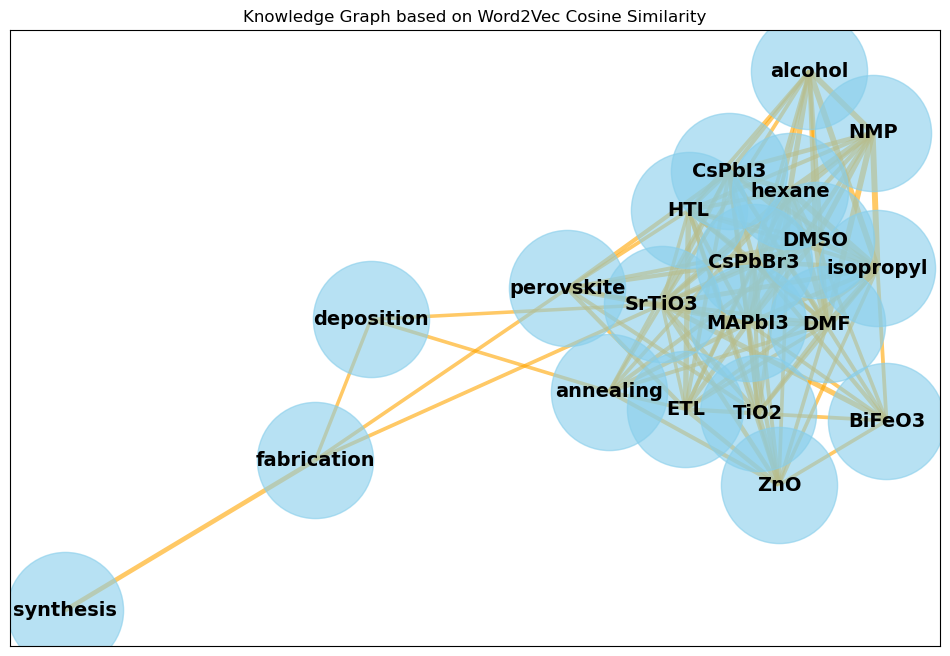

In [93]:
# 定义计算余弦相似度的函数
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 选择一些词并计算它们之间的余弦相似度
words = ['perovskite', 'HTL','NMP','hexane','DMSO','DMF','isopropyl','alcohol','CsPbBr3', 'TiO2','ZnO','CsPbI3', 'MAPbI3', 'SrTiO3', 'BiFeO3','ETL','material', 'synthesis', 'fabrication', 'deposition', 'annealing']
threshold = 0.5

edges = []

for i in range(len(words)):
    for j in range(i + 1, len(words)):
        word1, word2 = words[i], words[j]
        similarity = cosine_similarity(model[word1], model[word2])
        if similarity > threshold:
            edges.append((word1, word2, similarity))

# 创建一个图
G = nx.Graph()

# 添加节点和边到图中
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 设置节点和边的属性
pos = nx.spring_layout(G)  # 使用spring布局

plt.figure(figsize=(12, 8))

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue', alpha=0.6)

# 绘制边，并根据权重（余弦相似度）设置颜色和宽度
edges = G.edges(data=True)
for edge in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], width=edge[2]['weight'] * 5, alpha=0.6, edge_color='orange')

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

# 设置图标题
plt.title("Knowledge Graph based on Word2Vec Cosine Similarity")

# 显示图形
plt.show()

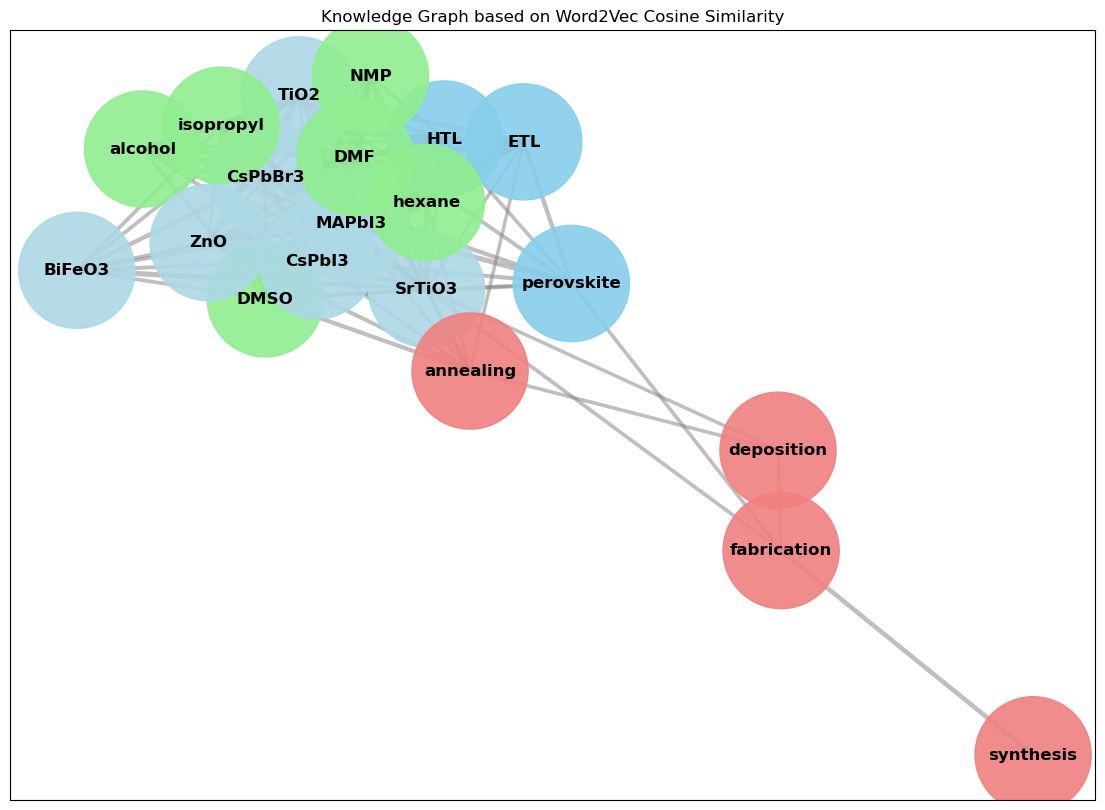

In [95]:


# 定义计算余弦相似度的函数
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 选择一些词并计算它们之间的余弦相似度
words = ['perovskite', 'HTL', 'NMP', 'hexane', 'DMSO', 'DMF', 'isopropyl', 'alcohol', 
         'CsPbBr3', 'TiO2', 'ZnO', 'CsPbI3', 'MAPbI3', 'SrTiO3', 'BiFeO3', 'ETL', 
         'material', 'synthesis', 'fabrication', 'deposition', 'annealing']

threshold = 0.5
edges = []

for i in range(len(words)):
    for j in range(i + 1, len(words)):
        word1, word2 = words[i], words[j]
        similarity = cosine_similarity(model[word1], model[word2])
        if similarity > threshold:
            edges.append((word1, word2, similarity))

# 创建一个图
G = nx.Graph()

# 添加节点和边到图中
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 设置节点类别
solvent_words = {'NMP', 'hexane', 'DMSO', 'DMF', 'isopropyl', 'alcohol'}
perovskite_words = {'CsPbBr3', 'TiO2', 'ZnO', 'CsPbI3', 'MAPbI3', 'SrTiO3', 'BiFeO3'}
fabrication_words = {'material', 'synthesis', 'fabrication', 'deposition', 'annealing'}

# 设置节点颜色
color_map = []
for node in G:
    if node in solvent_words:
        color_map.append('lightgreen')
    elif node in perovskite_words:
        color_map.append('lightblue')
    elif node in fabrication_words:
        color_map.append('lightcoral')
    else:
        color_map.append('skyblue')

# 设置节点和边的属性
pos = nx.spring_layout(G, k=0.5, iterations=50)  # 调整布局参数

plt.figure(figsize=(14, 10))

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color=color_map, alpha=0.9)

# 绘制边，并根据权重（余弦相似度）设置颜色和宽度
edges = G.edges(data=True)
for edge in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], width=edge[2]['weight'] * 5, alpha=0.5, edge_color='gray')

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# 设置图标题
plt.title("Knowledge Graph based on Word2Vec Cosine Similarity")

# 显示图形
plt.show()
